Dataset is taken from here: https://www.kaggle.com/mustafaali96/weight-height

### (1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('height_weight.csv')

df.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='height', ylabel='Count'>

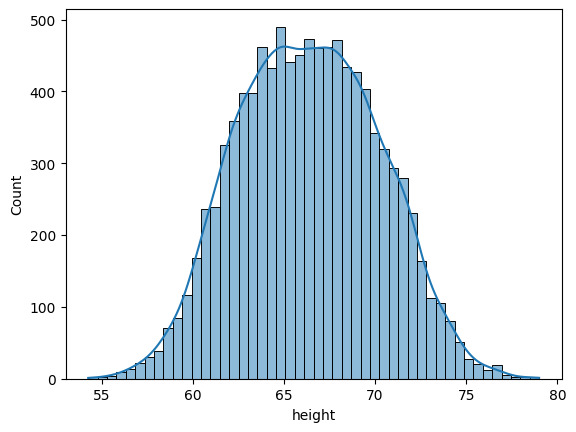

In [3]:
sns.histplot(df.height, kde=True)

<Axes: xlabel='weight', ylabel='Count'>

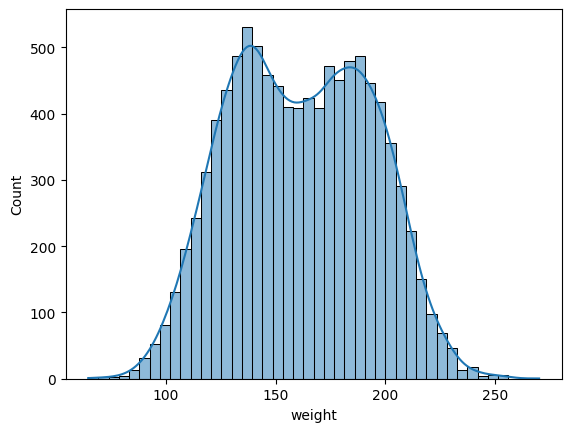

In [6]:
sns.histplot(df.weight, kde=True)

### (2) Using IQR detect weight outliers and print them

In [7]:
df.weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: weight, dtype: float64

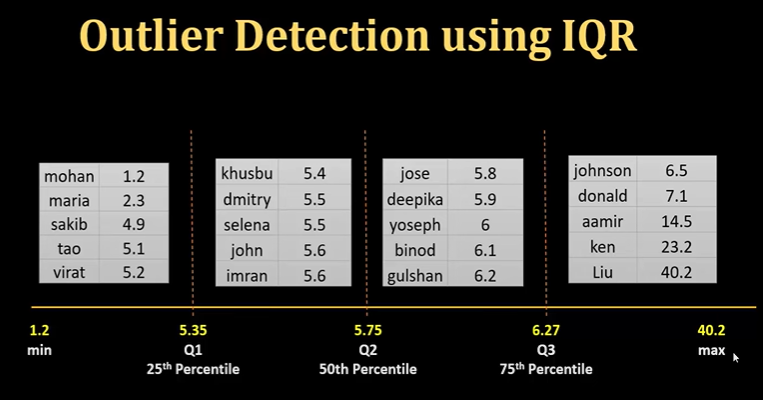

In [10]:
Q1 = df.weight.quantile(0.25)
Q2 = df.weight.quantile(0.5)
Q3 = df.weight.quantile(0.75)

Q1, Q2, Q3

(135.8180513055015, 161.21292769948298, 187.16952486868348)

In [12]:
# formula
IQR = Q3 - Q1

IQR

51.35147356318197

In [16]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

lower_limit, upper_limit

(58.79084096072856, 264.19673521345646)

In [25]:
weight_outliers = df[(df.weight<lower_limit) | (df.weight>upper_limit)]

weight_outliers.head()

,gender,height,weight
2014,Male,78.998742,269.989699


### (3) Using IQR, detect height outliers and print them

In [29]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

In [26]:
Q1 = df.height.quantile(0.25)
Q2 = df.height.quantile(0.5)
Q3 = df.height.quantile(0.75)

Q1, Q2, Q3

(63.505620481218955, 66.31807008178464, 69.1742617268347)

In [27]:
# formula
IQR = Q3 - Q1

IQR

5.668641245615746

In [28]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [31]:
height_outliers = df[(df.height<lower_limit) | (df.height>upper_limit)]

height_outliers

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [33]:
combined_outliers = pd.concat([weight_outliers, height_outliers])

combined_outliers

,gender,height,weight
2014,Male,78.998742,269.989699
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127
